In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#h-clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#k-means clusterinfg
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA

#Regression with L1 & L2
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Other for model building
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

AxesSubplot(0.125,0.125;0.62x0.755)
(891, 9)


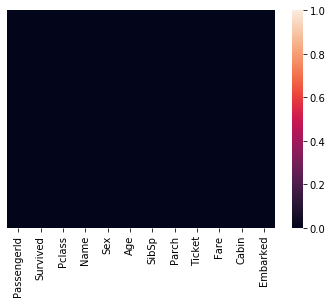

In [2]:
var=pd.read_csv('/content/titanic.csv')
var['Age'] = var['Age'].fillna(var['Age'].mean())
var['Cabin'] = var.Cabin.fillna(0)
print(sns.heatmap(var.isnull(),yticklabels=False))
varun=var
varun.drop(['Name','Ticket','Cabin'],axis=1,inplace = True)
print(varun.shape)

In [3]:
a=pd.get_dummies(varun['Sex'])
b=pd.get_dummies(varun['Embarked'])
varun=pd.concat([varun,a,b],axis='columns')
print(varun.shape)
varun.drop(['Sex','Embarked'],axis=1,inplace = True)
varun.head(10)
varun.drop(['PassengerId','Survived'],axis=1,inplace = True)
print(varun.head(2))

(891, 14)
   Pclass   Age  SibSp  Parch     Fare  female  male  C  Q  S
0       3  22.0      1      0   7.2500       0     1  0  0  1
1       1  38.0      1      0  71.2833       1     0  1  0  0


In [0]:
y=var['Survived']
X=varun

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [0]:
#DecisionTreeClassifier

confusion matrix
[[89 23]
 [17 50]]

accuracy score
0.776536312849162

cross-validation
[0.74860335 0.78089888 0.76966292 0.76404494 0.78089888]
0.7808988764044944

Classification-report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179


MAE: 0.22346368715083798
MSE: 0.22346368715083798
RMSE: 0.47271945924706543


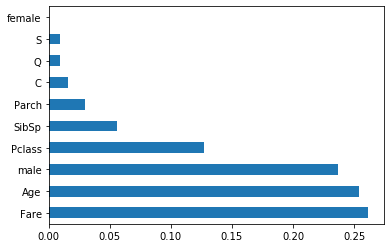

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
print('confusion matrix')
print(cm)
print()
ac=accuracy_score(y_pred,y_test)
print('accuracy score')
print(ac)
print()  
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree,X,y,cv=5)
print('cross-validation')
print(score)
print(max(score))
print()
cr=classification_report(y_test,y_pred)
print('Classification-report')
print(cr)
print()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
# RandomForestClassifier

confusion matrix
[[96 27]
 [10 46]]

accuracy score
0.7932960893854749

cross-validation
[0.79888268 0.81460674 0.8258427  0.76966292 0.81460674]
0.8258426966292135

Classification-report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       106
           1       0.82      0.63      0.71        73

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179


MAE: 0.20670391061452514
MSE: 0.20670391061452514
RMSE: 0.454647017602145


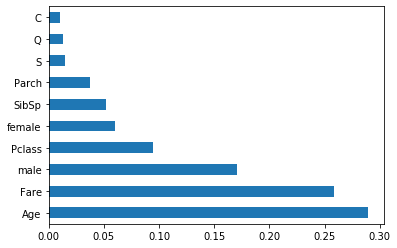

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
print('confusion matrix')
print(cm)
print()
ac=accuracy_score(y_pred,y_test)
print('accuracy score')
print(ac)
print()
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,X,y,cv=5)
print('cross-validation')
print(score)
print(max(score))
print()
cr=classification_report(y_test,y_pred)
print('Classification-report')
print(cr)
print()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
# GaussianNB

In [13]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
print('confusion matrix')
print(cm)
print()
ac=accuracy_score(y_pred,y_test)
print('accuracy score')
print(ac)
print()
from sklearn.model_selection import cross_val_score
score=cross_val_score(nb,X,y,cv=5)
print('cross-validation')
print(score)
print(max(score))
print()
cr=classification_report(y_test,y_pred)
print('Classification-report')
print(cr)
print()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

confusion matrix
[[87 22]
 [19 51]]

accuracy score
0.770949720670391

cross-validation
[0.76536313 0.79775281 0.78651685 0.79213483 0.80337079]
0.8033707865168539

Classification-report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       106
           1       0.73      0.70      0.71        73

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


MAE: 0.22905027932960895
MSE: 0.22905027932960895
RMSE: 0.478591975830779


In [0]:
# KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
print('confusion matrix')
print(cm)
print()
ac=accuracy_score(y_pred,y_test)
print('accuracy score')
print(ac)
print()
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,y,cv=5)
print('cross-validation')
print(score)
print(max(score))
print()
cr=classification_report(y_test,y_pred)
print('Classification-report')
print(cr)
print()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

confusion matrix
[[90 33]
 [16 40]]

accuracy score
0.7262569832402235

cross-validation
[0.65921788 0.6741573  0.71348315 0.73033708 0.71348315]
0.7303370786516854

Classification-report
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       106
           1       0.71      0.55      0.62        73

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179


MAE: 0.2737430167597765
MSE: 0.2737430167597765
RMSE: 0.5232045649263551


In [0]:
# SVC(Support Vector Machine)

In [17]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
print('confusion matrix')
print(cm)
print()
ac=accuracy_score(y_pred,y_test)
print('accuracy score')
print(ac)
print()
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,y,cv=5)
print('cross-validation')
print(score)
print(max(score))
print()
cr=classification_report(y_test,y_pred)
print('Classification-report')
print(cr)
print()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

confusion matrix
[[90 24]
 [16 49]]

accuracy score
0.776536312849162

cross-validation
[0.65921788 0.6741573  0.71348315 0.73033708 0.71348315]
0.7303370786516854

Classification-report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179


MAE: 0.22346368715083798
MSE: 0.22346368715083798
RMSE: 0.47271945924706543
